# Clase 05 - Raíces de ecuaciones

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [2]:
plt.style.use('seaborn-poster')

Implementemos una rutina de busqueda incremental para buscar los ceros de la función $f(x)=x^3-10x^2 + 5$ en el intervalo $[0,1]$

In [3]:
def rootsearch(f,a,b,dx):
    x1 = a
    f1 = f(a)
    x2 = a + dx
    f2 = f(x2)
    while( np.sign(f1) == np.sign(f2) ):
        if( x1  >=  b ): 
            return (None,None)
        x1 = x2
        f1 = f2
        x2 = x1 + dx
        f2 = f(x2)
    else:
        return (x1,x2)

In [4]:
def f(x):
    return (x**3 - 10.0*x**2 + 5)

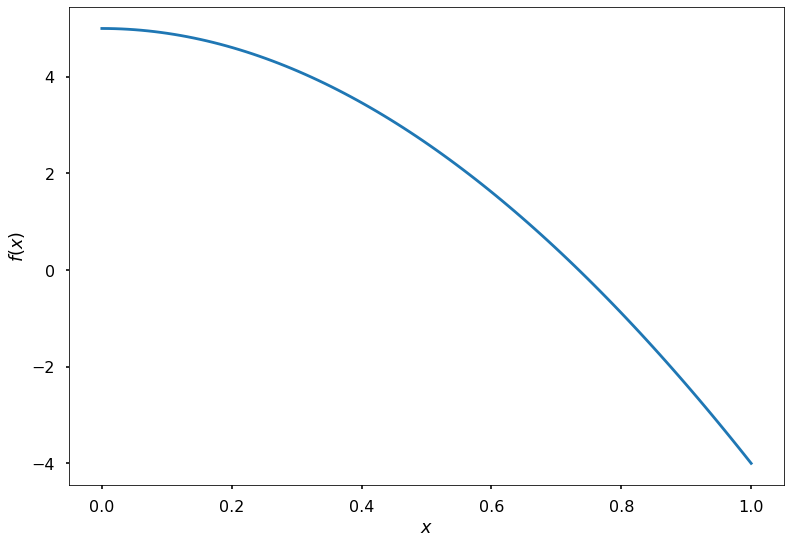

In [5]:
x = np.linspace(0,1,100)
plt.plot(x,f(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$');

In [6]:
N = 20
x1 = 0.0
x2 = 1.0
for i in range(12):
    dx = (x2 - x1)/N
    x1,x2 = rootsearch(f,x1,x2,dx)
    x = (x1 + x2)/2.0
    print (i,x)

0 0.7250000000000001
1 0.7337499999999995
2 0.7345625000000002
3 0.7346031249999999
4 0.7346035937499997
5 0.7346035078124996
6 0.7346035074218742
7 0.7346035077929686
8 0.7346035077900387
9 0.7346035077893064
10 0.7346035077893039
11 0.7346035077893032


In [7]:
x0 = fsolve(f,0.3)
print ('solución "exacta" =',x0[0])

solución "exacta" = 0.7346035077893033


Ahora implementemos el método de bisección

In [8]:
def biseccion(f,x1,x2,tol=1.0e-9):
    f1 = f(x1)
    if( f1 == 0.0 ):
        return (x1)
    f2 = f(x2)
    if( f2 == 0.0 ):
        return (x2)
    if( f1*f2 > 0.0 ):
        print ("La raíz no está encerrada en el intervalo")
        return (None)
    
    dx = np.abs(x2 - x1)
    n = int(np.ceil(np.log(dx/tol)/np.log(2.0)))

    for i in range(n):
        x3 = 0.5*(x1 + x2)
        f3 = f(x3)
        if( abs(f3) > abs(f1) and abs(f3) > abs(f2) ):
            return (None)
        if( f3 == 0.0 ):
            return (x3)
        if( f2*f3 < 0.0 ):
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3
    
    return (0.5*(x1 + x2))

In [9]:
print (biseccion(f,0.0,1.0,tol=1.0e-16))

0.7346035077893033


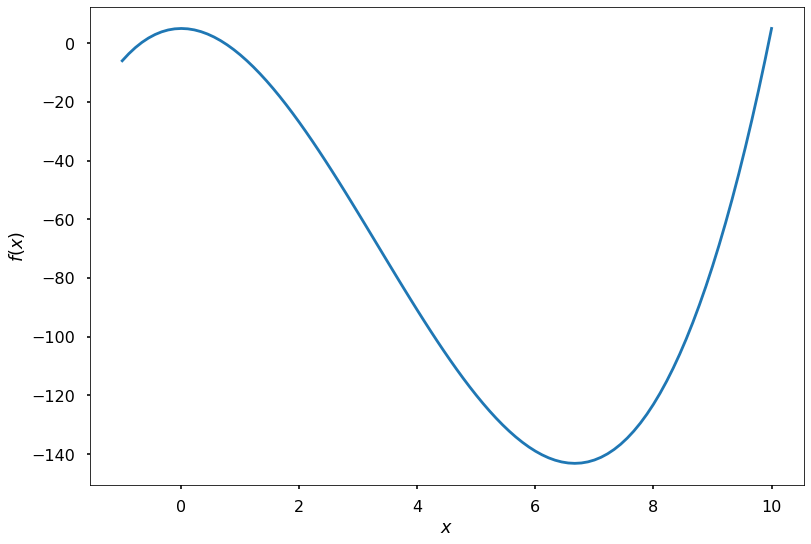

In [10]:
x = np.linspace(-1,10,100)
plt.plot(x,f(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$');

Ahora combinemos ambas rutinas para buscar todos los ceros de la función $f(x)=x^3-10x^2 + 5$

In [11]:
def raices(f,a,b,dx):
    while( True ):
        x1, x2 = rootsearch(f,a,b,dx)
        if( x1 != None ):
            a = x2
            root = biseccion(f,x1,x2,tol=1.0e-9)
            if( root != None ):
                print(root,f(root))
        else:
            print("Done")
            break

In [12]:
raices(f,-1,10,0.001)

-0.6840945658683774 -2.4844570845061753e-09
0.7346035075187698 3.5367238027106396e-09
9.949491057872699 -4.084768079337664e-09
Done


In [13]:
def f1(x): 
    return (x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752)

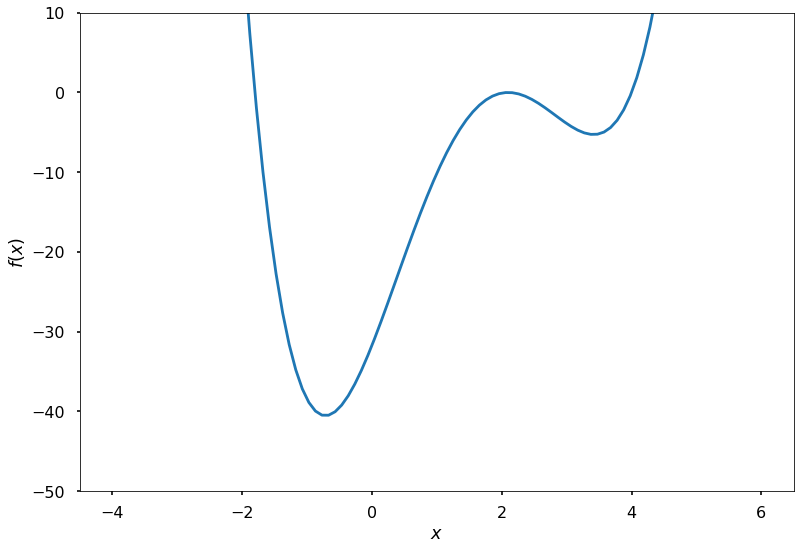

In [14]:
x = np.linspace(-4,6,100)
plt.plot(x,f1(x))
plt.xlabel('$x$')
plt.ylim(-50,10)
plt.ylabel('$f(x)$');

In [15]:
raices(f1,-2.0,6.0,0.001)

-1.7999999995231848 -4.2063671656933366e-08
2.1000000252721396 -1.4210854715202004e-14
4.0000000004763985 9.97479432385262e-09
Done
